<a href="https://colab.research.google.com/github/Coast2Coast14/avocado_data_viz/blob/main/smallproject3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read in data
avocado_data = pd.read_csv('/content/drive/MyDrive/avocado.csv')

In [ ]:
display(avocado_data)

,Date,AveragePrice,Number_Avocados_Sold,type,region
0,4/23/17,1.324522,363844,organic,Roanoke
1,3/29/15,1.297376,412844,conventional,SanFrancisco
2,2/18/18,1.469304,75577,organic,Louisville
3,11/15/15,1.681869,71767,organic,Albany
4,6/21/15,1.334113,77936,organic,SanFrancisco
...,...,...,...,...,...
999995,8/13/17,1.325874,360944,conventional,California
999996,7/10/16,1.400951,81854,organic,Denver
999997,10/15/17,0.907641,46325,organic,Albany
999998,4/30/17,1.580911,164562,organic,Spokane


In [ ]:
# Changes date column to datetime format
avocado_data['Date'] = pd.to_datetime(avocado_data['Date'], infer_datetime_format=True)

# Creates a column of the year of each record
avocado_data['Year'] = pd.DatetimeIndex(avocado_data['Date']).year
# Gets the data with years between 2015 and 2017
mask = avocado_data['Year'].between(2015, 2017)

# Gets the data with years between 2015 and 2017
avocado_2015_to_2017 = avocado_data.loc[mask]

# Gets only the positive records
pos_avocado_2015_to_2017 = avocado_2015_to_2017[avocado_2015_to_2017['Number_Avocados_Sold'] > 0]

Plot 1

In [ ]:
# Line graph of the two avocados during the period against each other

# Gets either only the conventional or organic avocado sales
conventional = pos_avocado_2015_to_2017.loc[pos_avocado_2015_to_2017['type'] == 'conventional']
organic = pos_avocado_2015_to_2017.loc[pos_avocado_2015_to_2017['type'] == 'organic']

# Groups the conventional and organic avocado sales by year and sums the sales together
org_by_year = organic.groupby('Year')['Number_Avocados_Sold'].sum()
conv_by_year = conventional.groupby('Year')['Number_Avocados_Sold'].sum()

# Divides the yearly sales to graph them in billions
org_billions = org_by_year / 1000000000
conv_billions = conv_by_year / 1000000000

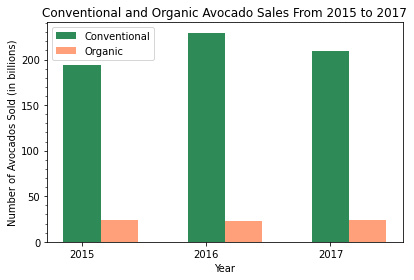

In [ ]:
import matplotlib.ticker as tck

# Makes 3 tick marks for the x axis
x = np.arange(3)
# Says how wide the bars will be
width = .3

fig, ax = plt.subplots()
# Plots the yearly sales with width putting one bar next to the other
plt.bar(x, conv_billions, width, color = 'seagreen')
plt.bar(x + width, org_billions, width, color = 'lightsalmon')
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
# Puts the years on the x axis
plt.xticks(x, ['2015', '2016', '2017'])
# Names the x axis as year
plt.xlabel('Year')
# Names the y axis for avocados sold in billions
plt.ylabel('Number of Avocados Sold (in billions)')
# Legend to distinguish the bars
plt.legend(['Conventional', 'Organic'])
# Creates the title
plt.title('Conventional and Organic Avocado Sales From 2015 to 2017')
plt.tight_layout()

Plot 2

In [ ]:
# Grouped bar chart of top 5 cities in total avocado sales, two separate plots
# with one showing the total sales and the other broken down by year

# Starting with showing total sales

sales_by_region = pos_avocado_2015_to_2017.groupby('region')
summed_sales_by_region = sales_by_region['Number_Avocados_Sold'].sum()
sorted_sales = summed_sales_by_region.sort_values(ascending=False)
sorted_sales

# The top 5 cities in avocado sales during this period were Los Angeles, the Phoenix-Tucson area,
# Portland, the Dallas-Ft. Worth area, and Seattle

region
California             39315079686
Southeast              32698382235
GreatLakes             26557368600
Northeast              25460970061
West                   24962518817
LosAngeles             22762170652
PhoenixTucson          22663637073
Portland               21572897400
TotalUS                20974909218
Midsouth               20689630113
DallasFtWorth          19328886870
Plains                 19041435897
WestTexNewMexico       17611178504
SouthCentral           17490505431
Seattle                16622240673
MiamiFtLauderdale      15174525002
Denver                 13949114161
NewYork                13873723918
SanFrancisco           13439027202
Atlanta                13322571603
Detroit                13301731545
SouthCarolina          13295670313
CincinnatiDayton       11857747349
Philadelphia           11454666061
SanDiego               11403601534
Tampa                  11288898569
Chicago                10749626674
BaltimoreWashington    10647669325
Columbus     

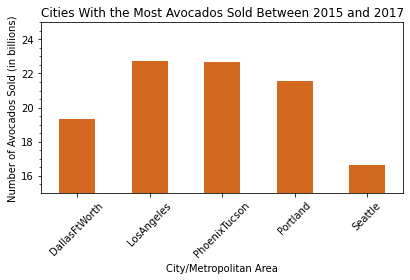

In [ ]:
# Get the top 5 cities from the data
city_mask = pos_avocado_2015_to_2017['region'].isin(['LosAngeles', 'PhoenixTucson', 'Portland',
                                                     'DallasFtWorth', 'Seattle'])

# Gets top 5 cities from the data
top_city_sales = pos_avocado_2015_to_2017.loc[city_mask]
# Groups the top city sales by city
top_sales_by_city = top_city_sales.groupby('region')
# Sums the sales by city
top_summed_city_sales = top_sales_by_city['Number_Avocados_Sold'].sum()
# Divides the total sales to graph them in billions
summed_city_billions = top_summed_city_sales / 1000000000

fig, ax = plt.subplots()
# Creates a bar chart out of the total city sales
summed_city_billions.plot(kind = 'bar', rot = 45, color = 'chocolate')
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
# Labels the x axis
plt.xlabel('City/Metropolitan Area')
# Labels the y axis
plt.ylabel('Number of Avocados Sold (in billions)')
# Sets the range for the y axis
plt.ylim([15, 25])
# Creates a title
plt.title('Cities With the Most Avocados Sold Between 2015 and 2017')
plt.tight_layout()

In [ ]:
# Gets the data for only avocados sold in Dallas
dallas = pos_avocado_2015_to_2017.loc[pos_avocado_2015_to_2017['region'] == 'DallasFtWorth']
# Sums the yearly number of avocados sold in Dallas
dallas_by_year = dallas.groupby('Year')['Number_Avocados_Sold'].sum()
# Divides the yearly sales to graph them in billions
dallas_billions = dallas_by_year / 1000000000

# Repeat the steps above for each of the other top 4 cities

losangeles = pos_avocado_2015_to_2017.loc[pos_avocado_2015_to_2017['region'] == 'LosAngeles']
losangeles_by_year = losangeles.groupby('Year')['Number_Avocados_Sold'].sum()
losangeles_billions = losangeles_by_year / 1000000000

phoenix = pos_avocado_2015_to_2017.loc[pos_avocado_2015_to_2017['region'] == 'PhoenixTucson']
phoenix_by_year = phoenix.groupby('Year')['Number_Avocados_Sold'].sum()
phoenix_billions = phoenix_by_year / 1000000000

portland = pos_avocado_2015_to_2017.loc[pos_avocado_2015_to_2017['region'] == 'Portland']
portland_by_year = portland.groupby('Year')['Number_Avocados_Sold'].sum()
portland_billions = portland_by_year / 1000000000

seattle = pos_avocado_2015_to_2017.loc[pos_avocado_2015_to_2017['region'] == 'Seattle']
seattle_by_year = seattle.groupby('Year')['Number_Avocados_Sold'].sum()
seattle_billions = seattle_by_year / 1000000000

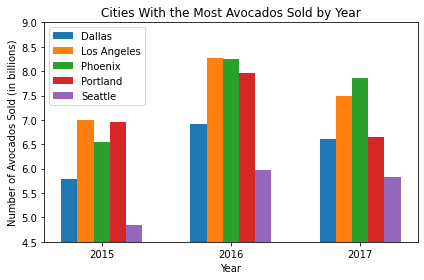

In [ ]:
# Makes 3 tick marks for the x axis
x = np.arange(3)
# Says how wide the bars will be
width = .125

# Plots the yearly sales with width putting one bar next to the other
plt.bar(x - 2*width, dallas_billions, width)
plt.bar(x - width, losangeles_billions, width)
plt.bar(x, phoenix_billions, width)
plt.bar(x + width, portland_billions, width)
plt.bar(x + 2*width, seattle_billions, width)
# Puts the years on the x axis
plt.xticks(x, ['2015', '2016', '2017'])
# Labels the x axis
plt.xlabel('Year')
# Labels the y axis
plt.ylabel('Number of Avocados Sold (in billions)')
# Creates a title
plt.title('Cities With the Most Avocados Sold by Year')
# Sets the range for the y axis
plt.ylim([4.5, 9])
# Creates a legend for the bar chart
plt.legend(['Dallas', 'Los Angeles', 'Phoenix', 'Portland', 'Seattle'])
plt.tight_layout()

Plot 3

In [ ]:
# Line graph graphing the three cities on the same plot against each other

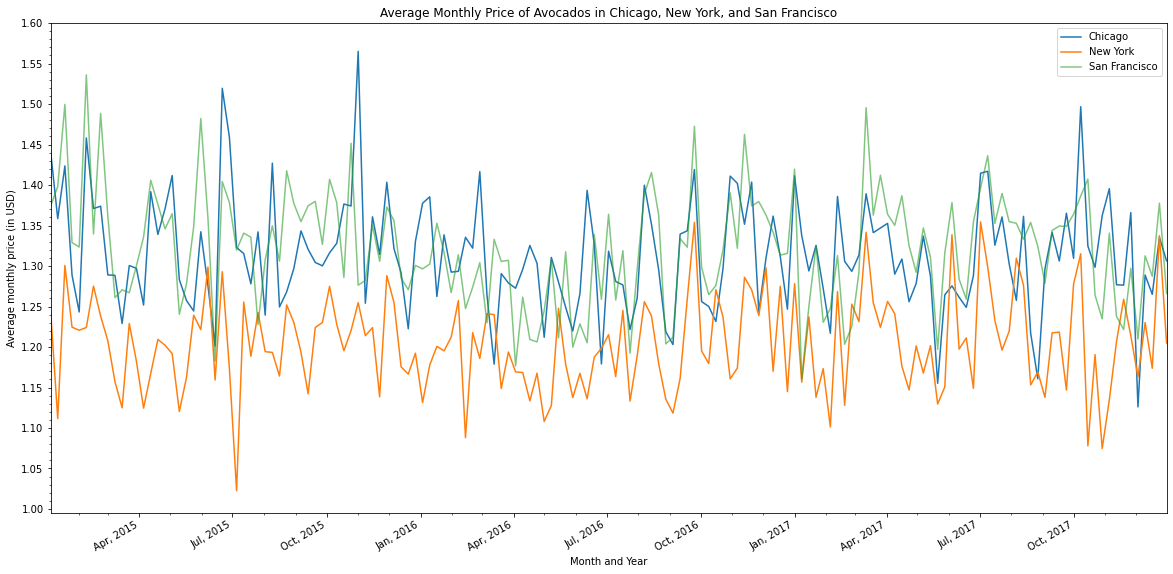

In [ ]:
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

# Gets the data for Chicago, New York, and San Francisco
chicago = pos_avocado_2015_to_2017.loc[pos_avocado_2015_to_2017['region'] == 'Chicago']
new_york = pos_avocado_2015_to_2017.loc[pos_avocado_2015_to_2017['region'] == 'NewYork']
san_fran = pos_avocado_2015_to_2017.loc[pos_avocado_2015_to_2017['region'] == 'SanFrancisco']

# Groups the city average prices by date and gets their means
chicago_prices = chicago.groupby(['Date'])['AveragePrice'].mean()
new_york_prices = new_york.groupby(['Date'])['AveragePrice'].mean()
san_fran_prices = san_fran.groupby(['Date'])['AveragePrice'].mean()

# Creates the plot and specifies the graph size
fig, ax = plt.subplots(figsize=(20, 10))

# Plots the three average prices over time
ax.plot(chicago_prices)
ax.plot(new_york_prices)
ax.plot(san_fran_prices, alpha = .6)

# Formats the dates on the x axis
month_year_formatter = mdates.DateFormatter('%b, %Y')
ax.xaxis.set_major_formatter(month_year_formatter)

# Gets rid of the margins around the lines
ax.margins(x=0)

# Makes the month and year on the x axis show every 3 months
half_year_locator = mdates.MonthLocator(interval=3)
ax.xaxis.set_major_locator(half_year_locator)

# Creates minor ticks on the x axis to show the average price at each month
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_minor_locator(monthly_locator)

# Labels the x and y axes
plt.xlabel('Month and Year')
plt.ylabel('Average monthly price (in USD)')
# Creates a title
plt.title('Average Monthly Price of Avocados in Chicago, New York, and San Francisco')
# Creates a legend for the bar chart
plt.legend(['Chicago', 'New York', 'San Francisco'])

# Sets the tick range and interval on y axis
ax.yaxis.set_ticks(np.arange(1, 1.6, .05))
# Sets the minor ticks on the y axis
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Auto-formats the date on the x axis
fig.autofmt_xdate()